# Chapter 12: Bayesian analysis

```{epigraph}
*"Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step."*

-- Lao Tzu
```

```{seealso}
- [Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference)
```

In the Bayesian framework, probability is
opinion, and that inference from data is nothing other than the revision
of such opinion in the light of relevant new information.

````{prf:example}
:nonumber:
There are two boxes in the room: 5 red balls and 5 blue balls
in box1; 1 red ball and 9 blue balls in box2. Someone randomly selected
a box and took 4 balls with replacement from the box. Suppose all
selected balls are blue. We want to know the box from which the balls
were selected.

![](./images/boxes.png)

Let $X$ be the number of blue balls selected from the box. Given box1, X
follows Binomial(n=4, p=0.5). Given box2, $X$ follows Binomial(n=4,
p=0.9). We assume that two boxes are equally likely to be selected,
i.e., $P(box1) = P(box2) = 0.5$. 

Given the observed data $X=4$, we want to calculate the probability $P(box1 | X=4)$ 
and the probability $P(box2| X=4)$. By the Bayes rule,

$$P(box1|X = 4) = \frac{P(X = 4|box1)P(box1)}{P(X = 4)}$$

and

$$P(box2|X = 4) = \frac{P(X = 4|box2)P(box2)}{P(X = 4)}$$

We know that

$$P(X = 4) = P\left( X = 4 \middle| box1 \right)P(box1) + P\left( X = 4 \middle| box2 \right)P(box2) = 0.3593$$

Thus,

$$P(box1|X = 4) = \frac{0.03125}{0.3593} = 0.087$$

and

$$P(box2|X = 4) = \frac{0.32805}{0.3593} = 0.913$$

We conclude that the 4 blue balls are more likely to be selected from
box2. 
````

In this example, the two boxes are the parameter $\theta = 1\ or\ 2$. The probability distribution of data, $P(X|\theta)$, is
called the likelihood function. The probability distribution $P(\theta = 1) = P(\theta = 2) = 0.5$ is the prior distribution of the parameter $\theta$. The Bayesian inference of
$\theta$ is based on the posterior distribution of parameter $\theta$
given data X, i.e.,

$$P\left( \theta \middle| X \right) = \frac{P(X|\theta)P(\theta)}{P(X)}$$

For the continuous data $X$, the posterior density of $\theta$ is given by

$$f\left( \theta \middle| X \right) = \frac{f(X|\theta)f(\theta)}{f(X)}$$

The normalizing constant
$f(X) = \int_{- \infty}^{\infty}{f\left( X \middle| \theta \right)f(\theta)d\theta}$
 is often intractable. Numerical approaches
(MCMC algorithms) are used to approximate the posterior distribution
$f\left( \theta \middle| X \right)$ of $\theta$.

## Prior distribution 

### 1. conjugate prior
A conjugate prior is an algebraic convenience, giving a close-form expression for the posterior;
otherwise numerical approaches may be necessary.

| Likelihood |  Conjugate prior  | Posterior|
| ---|---|---|
|  Normal|                 Normal  |                 Normal|
 | Uniform |                Pareto   |                Pareto|
  |Weibull  |               Inverse gamma  |          Inverse gamma|
 | Log-normal  |            Normal   |                Normal|
 | Exponential   |          Gamma   |                 Gamma|
 | Inverse gamma  |         Gamma  |                  Gamma|
|  Gamma        |           Gamma  |                  Gamma\
|  Binomial      |          Beta   |                  Beta|
|  Negative binomial |      Beta    |                 Beta|
|  Poisson     |            Gamma   |                 Gamma|
|  Multinomial   |          Dirichlet    |            Dirichlet|
| | | |
  

### 2. non-informative prior

For example, the uniform prior of parameter $\theta$ is a non-informative prior, because all possible values of $\theta$ are equally likely, no preference.

### 3. Empirical Bayesian
The prior distribution $P(\theta)$ is estimated from data

### 4. Sensitivity analysis
The Bayesian inference is based on many prior distributions to see if the inference is significantly affected by different priors. If not, it indicates that the Bayesian inference is robust to the prior distribution.

## Bayesian estimation

Let $\widehat{\theta}$ be a Bayesian estimator of $\theta$ and let
$L(\theta,\widehat{\theta})$ be a loss function, such as the squared loss 

$$L\left( \theta,\widehat{\theta} \right) = \left( \theta - \widehat{\theta}(x) \right)^{2}$$

````{prf:definition} Bayes risk
:label: Bayes risk
The Bayes risk of $\widehat{\theta}\ $is defined as

$$E\left( L\left( \theta,\widehat{\theta} \right) \right) = \int_{\theta}^{}{\int_{x}^{}{L\left( \theta,\widehat{\theta}(x) \right)f\left( x \middle| \theta \right)f(\theta)dxd\theta}}$$
````

The expectation is taken over the probability distribution of data $X$ and parameter $\theta$. 

````{prf:definition} Bayes estimator
:label: Bayes estimator
An estimator $\widehat{\theta}\ $is said to be a Bayes estimator if it
minimizes the Bayes risk among all estimators.
````

The estimator which minimizes the posterior expected loss
$E\left( L\left( \theta,\widehat{\theta} \right)|X \right)$ for each $X$
also minimizes the Bayes risk and therefore is a Bayes estimator. 

````{prf:example}
:nonumber:
If the loss function is squared error, the Bayesian estimate
$\widehat{\theta}$ of $\theta$ is the posterior mean $E(\theta|X)$,
because the risk function is given by

$$E\left( L\left( \theta,\widehat{\theta} \right)|X \right) = \int_{\theta}^{}{\left( \theta - \widehat{\theta}(x) \right)^{2}f\left( \theta \middle| x \right)d\theta}$$

It follows that

$$\frac{\partial E\left( L\left( \theta,\widehat{\theta} \right)|X \right)}{\partial\widehat{\theta}(x)} = \int_{\theta}^{}{2\left( \theta - \widehat{\theta}(x) \right)f\left( \theta \middle| x \right)d\theta} = 2E\left( \theta \middle| x \right) - 2\widehat{\theta}(x) = 0$$

Thus,

$${\widehat{\theta}}_{Bayes}(x) = E(\theta|x)$$
````

## Markov Chain Monte Carlo algorithm

Markov chain Monte Carlo (MCMC) methods are a class of algorithms for
sampling from a target probability distribution. It can be shown that
the samples generated from the MCMC algorithms converge to the target
probability distribution.

In Bayesian analysis, the target probability distribution is the
posterior distribution. Suppose the likelihood function $f(x|\theta)$
and prior $f(\theta)$ are given. The posterior density of $\theta$ is
given by

$$f\left( \theta \middle| x \right) = \frac{f(x|\theta)f(\theta)}{f(x)}$$

Since the normalizing constant $f(x)$ is often intractable, the
posterior distribution is known up to the normalizing constant. Because
the MCMC algorithms do not require to know the normalizing constant, they can approximate the posterior probability by sampling from the posterior distribution.

The commonly used MCMC algorithms include Gibbs sampling and
Metropolis-Hastings algorithm. We here describe the
Metropolis-Hastings algorithm

````{prf:algorithm} Metropolis-Hastings
:nonumber:

**Input:** the likelihood and prior
**Output** a sample generated from the target distribution

1. An arbitrary initial value for $\theta = \theta_{0}$

2.  We update $\theta$ as follows. Suppose the current value is
    $\theta_{n}$. A new value of $\theta$ is proposed in the
    neighborhood of $\theta_{n}$. For example, $\theta_{new}$ is
    generated from the uniform distribution on
    $\lbrack\theta_{n} - c,\theta_{n} + c\rbrack$. The proposal
    distribution is the probability distribution from which
    $\theta_{new}$ is proposed, written as $P(\theta_{new}|\theta_{n})$.
    Here, we use the uniform distribution (it is often called random
    walk) as the proposal distribution.

3.  The newly proposed $\theta_{new}$ is either accepted or rejected
    according to the probability known as the Hastings ratio,

$$\theta_{n + 1} = \left{ \begin{matrix}
\theta_{new}\ with\ probabilty = \ min{\frac{f\left( \theta_{new} \middle| x \right)P\left( \theta_{n} \middle| \theta_{new} \right)}{f\left( \theta_{n} \middle| x \right)P\left( \theta_{new} \middle| \theta_{n} \right)},\ 1} \\
\theta_{n},\ otherwise \\
\end{matrix} \right.\ $$

4.  Continue to generate $\theta$ until the algorithm converges
````

### 1. Burnin
Many approaches have been developed for checking the convergence of the MCMC algorithms.
A simple method is to make a log-likelihood plot. The log-likelihood
continues to increase and then it will become stable at some point,
indicating that the MCMC algorithm has converged. The time period before
the chain gets converged is called "burn-in". The samples generated
during burn-in should be discarded.

### 2. Subsampling
Note that the samples generated from the MCMC algorithms are not random
samples. They are dependent of each other, because the new value
$\theta_{new}$ is proposed from the neighborhood of the old value $\theta_{n}$. To
reduce dependency, we subsample $\theta$, for example, we sample every 1000 $\theta$.

### 3. Bayesian inference
Once we have a sample of $\theta$ generated from the posterior
distribution, the Bayesian inference can be based on the generated
sample. For example, the posterior mean, a Bayesian estimator of
parameter $\theta$, is approximated by the sample average of $\theta$
generated from the MCMC algorithm.

````{prf:example}
:nonumber:

$(x_{1},\ldots,x_{n})$ is a random sample generated from the
exponential distribution with mean $1/\lambda$. The prior of $\lambda$
is the exponential distribution with mean 1/2. The posterior
distribution of $\lambda$ given $(x_{1},\ldots,x_{n})$ is

$$f\left( \lambda \middle| X \right) = \frac{f(X|\lambda)f(\lambda)}{f(X)} = \frac{\lambda^{n}e^{- \lambda\sum_{i = 1}^{n}x_{i}}*2e^{- 2\lambda}}{f(X)} = \frac{2\lambda^{n}e^{- \left( \sum_{i = 1}^{n}x_{i} + 2 \right)\lambda}}{f(X)}$$

This is a gamma distribution with $\alpha = n + 1$ and
$\beta = \sum_{i = 1}^{n}x_{i} + 2$. The posterior mean is
$\frac{\alpha}{\beta} = \frac{n + 1}{\sum_{i = 1}^{n}x_{i} + 2}$. Thus,
the Bayesian estimate of $\lambda$ is
$\frac{n + 1}{\sum_{i = 1}^{n}x_{i} + 2}$.

Suppose the data is (1.001, 0.065, 0.014, 1.601, 0.288, 0.095, 0.401,
0.227, 0.234, 0.488). Then, the Bayesian estimate of $\lambda$ is

$$\frac{n + 1}{\sum_{i = 1}^{n}x_{i} + 2} = \frac{10 + 1}{4.41 + 2} = 1.716$$
````

Let's use the MCMC algorithm to approximate the posterior distribution
$f\left( \lambda \middle| X \right)$, then calculate the posterior mean.

The R code of the MCMC algorithm should have the following functions (1)
Likelihood function, (2) Prior, (3) a function for updating $\lambda$,
and (4) a function for accepting or rejecting the proposed
$\lambda_{new}$.

[1] "MCMC estimate of lambda: 0.978181536016448"


[1] "Bayesian estimate of lambda: 1.00478050725172"


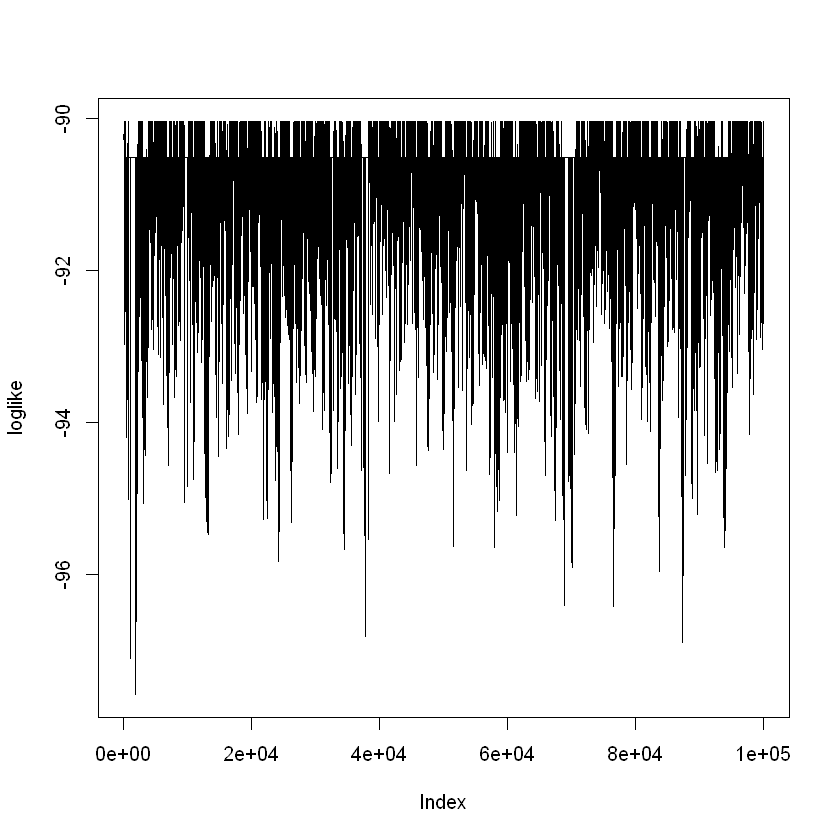

In [1]:
########################################################
# mcmc algorithm: likelihood: exp, prior: exp
########################################################
loglikelihood <- function (x, lambda) {
  n <- length(x)
  loglike <- n*log(lambda) - sum(x) * lambda
  return (loglike)
}
logprior <- function(lambda, theta) {
  logprior <- log(theta) - lambda*theta
  return (logprior)
}
update_lambda<-function(lambda, window_width){
  newlambda <- lambda + (2*runif(1)-1) * window_width
  return (newlambda)
}

#######################################################
# algorithm
########################################################
x = rexp(100)
samplesize = length(x)
theta <- 10 #prior of lambda
lambda_theory = (samplesize+1)/(sum(x)+theta)

totalround <- 100000
lambda <- 1:totalround
loglike <- 1:totalround
window_width <- 0.05

oldlambda <- 1 #initial value of lambda
oldloglike <- loglikelihood(x, oldlambda)
oldlogprior <- logprior(oldlambda, theta)

for (i in 1:totalround)
{
  newlambda <- update_lambda(oldlambda, window_width)
  if (newlambda<0) newlambda = -newlambda
  newloglike <- loglikelihood(x, newlambda)
  newlogprior <- logprior(newlambda, theta)

  hastings_ratio <- min(exp((newloglike+newlogprior)-(oldloglike+oldlogprior)),1)

  if(runif(1) < hastings_ratio){
    lambda[i] = newlambda
    loglike[i] = newloglike
    oldlambda = newlambda
    oldlogprior = newlogprior
  }else{
    lambda[i] = oldlambda
    loglike[i] = oldloglike
  }
}

plot(loglike,type="l")
burnin = totalround/2

print(paste("MCMC estimate of lambda:", mean(lambda[burnin:totalround])))
print(paste("Bayesian estimate of lambda:",lambda_theory))


## Bayesian hypothesis testing and model selection

We assume that data $X$ have arisen from one of the two hypotheses
$H_0$ and $H_1$ according to a probability density $P(X|H_{0})$ or
$P(X|H_{1})$. 

Given a priori probabilities $P(H_{0})$ and
$P\left( H_{1} \right) = 1 - P(H_{0})$, the posterior probability of
hypothesis $H_0$ is given by

$$P\left( H_{0} \middle| X \right) = \frac{P(X|H_{0})P(H_{0})}{P(X)}$$

Thus, the posterior odds is equal to

$$\frac{P\left( H_{0} \middle| X \right)}{P(H_{1}|X)} = \frac{P(X|H_{0})P(H_{0})}{P(X|H_{1})P(H_{1})}$$

The Bayes factor is $BF_{01} = \frac{P(X|H_{0})}{P(X|H_{1})}$.
When $H_0$ and $H_1$ are equally probable, the posterior odds is equal to
the Bayes factor. In addition,

$$P\left( X \middle| H_{0} \right) = \int_{- \infty}^{\infty}{P\left( X \middle| \theta_{0},H_{0} \right)P\left( \theta_{0} \middle| H_{0} \right)d\theta_{0}}$$

$P\left( X \middle| H_{0} \right)$ is the marginal likelihood under
$H_0$. Similarly, $P\left( X \middle| H_{1} \right)$ is the marginal
likelihood under $H_1$. Thus, the Bayes factor is the marginal likelihood
ratio statistic.

The Bayes factor is the summary of the evidence provided by the data in
favor of one scientific theory as opposed to another. Interpretation of
the Bayes factor

  
  |$log_{10}(B_{10})$    |      $B_{10}$     |               Evidence against $H_0$|
|---|---|---|
 | 0 to 1/2      |          1 to 3.2      |           Not worth more than a bare mention|
 | ½ to 1          |        3.2 to 10       |         substantial|
 | 1 to 2         |         10 to 100    |            Strong|
 | >2     |                >100     |               decisive|
 |   |   | |
  

The marginal likelihoods in the Bayes factor are often intractable. We
use numerical approaches to approximate the Bayes factor. A simple
approximation method is the harmonic mean approximation,

$$\frac{1}{P\left( X \middle| H_{0} \right)} = \int_{- \infty}^{\infty}{\frac{1}{P\left( X \middle| \theta_{0},H_{0} \right)}P\left( \theta_{0}|H_{0} \right)d\theta_{0}} = E\left( \frac{1}{P\left( X \middle| \theta_{0},H_{0} \right)} \right)$$

Thus,

$$\widehat{P\left( X \middle| H_{0} \right)} = \left\lbrack \frac{1}{n}\sum_{i = 1}^{m}\left( \frac{1}{P\left( X \middle| \theta_{0}^{i},H_{0} \right)} \right) \right\rbrack^{- 1}$$